In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nrem_sample = np.load('/kaggle/input/sleep-state-classification/nrem_sample.npy')
wakefulness_sample =  np.load('/kaggle/input/sleep-state-classification/wakefulness_sample.npy')
rem_sample = np.load('/kaggle/input/sleep-state-classification/rem_sample.npy')

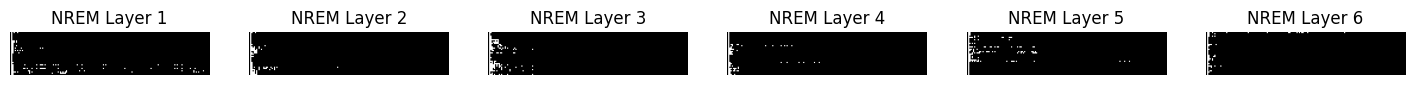

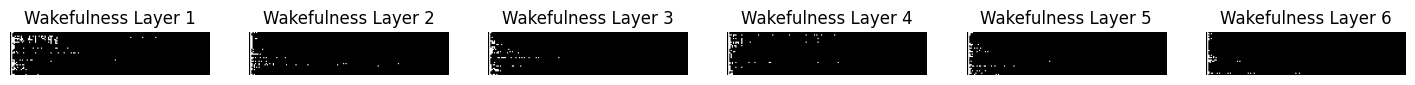

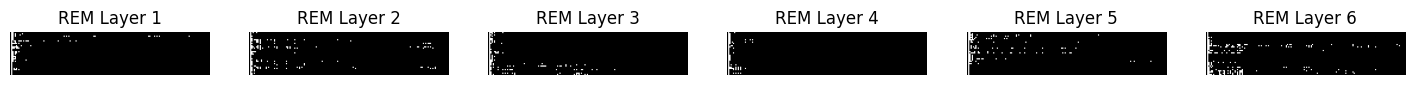

Stats for NREM:
Mean: 0.03615751141563164
Std Deviation: 0.186681937486893
Max value: 1
Min value: 0
--------------------------------
Stats for Wakefulness:
Mean: 0.035519207740750465
Std Deviation: 0.1850880699078687
Max value: 1
Min value: 0
--------------------------------
Stats for REM:
Mean: 0.03366370893823685
Std Deviation: 0.18036203491521866
Max value: 1
Min value: 0
--------------------------------


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def plot_samples(data, title):
    """Function to plot the first few layers of each sleep state sample."""
    plt.figure(figsize=(18, 6))
    for i in range(min(6, data.shape[0])):  # Plot up to 6 layers
        plt.subplot(1, 6, i + 1)
        
        # Get the layer and ensure it is 2D
        image_data = data[i]
        
        # Check if the data is inherently 3D or 4D and handle accordingly
        if image_data.ndim == 3:
            if image_data.shape[-1] in [3, 4]:  # RGB or RGBA image
                plt.imshow(image_data)
            else:
                image_data = image_data[:, :, 0]  # Take the first channel if it's not a color image
        elif image_data.ndim == 4:
            if image_data.shape[-1] in [3, 4]:
                plt.imshow(image_data)
            else:
                image_data = image_data[:, :, 0, 0]  # Assuming the first slice and channel
        elif image_data.ndim != 2:
            raise ValueError(f"Data at index {i} has dimension {image_data.ndim}, which is not supported for plotting.")
        
        plt.imshow(image_data, cmap='gray')
        plt.title(f'{title} Layer {i+1}')
        plt.axis('off')
    plt.show()

def print_stats(data, title):
    """Function to print the statistical summary of the sample data."""
    print(f'Stats for {title}:')
    print(f'Mean: {np.mean(data)}')
    print(f'Std Deviation: {np.std(data)}')
    print(f'Max value: {np.max(data)}')
    print(f'Min value: {np.min(data)}')
    print('--------------------------------')

# Example of how to call these functions
# Ensure your data is loaded correctly before calling the functions
plot_samples(nrem_sample, 'NREM')
plot_samples(wakefulness_sample, 'Wakefulness')
plot_samples(rem_sample, 'REM')

print_stats(nrem_sample, 'NREM')
print_stats(wakefulness_sample, 'Wakefulness')
print_stats(rem_sample, 'REM')


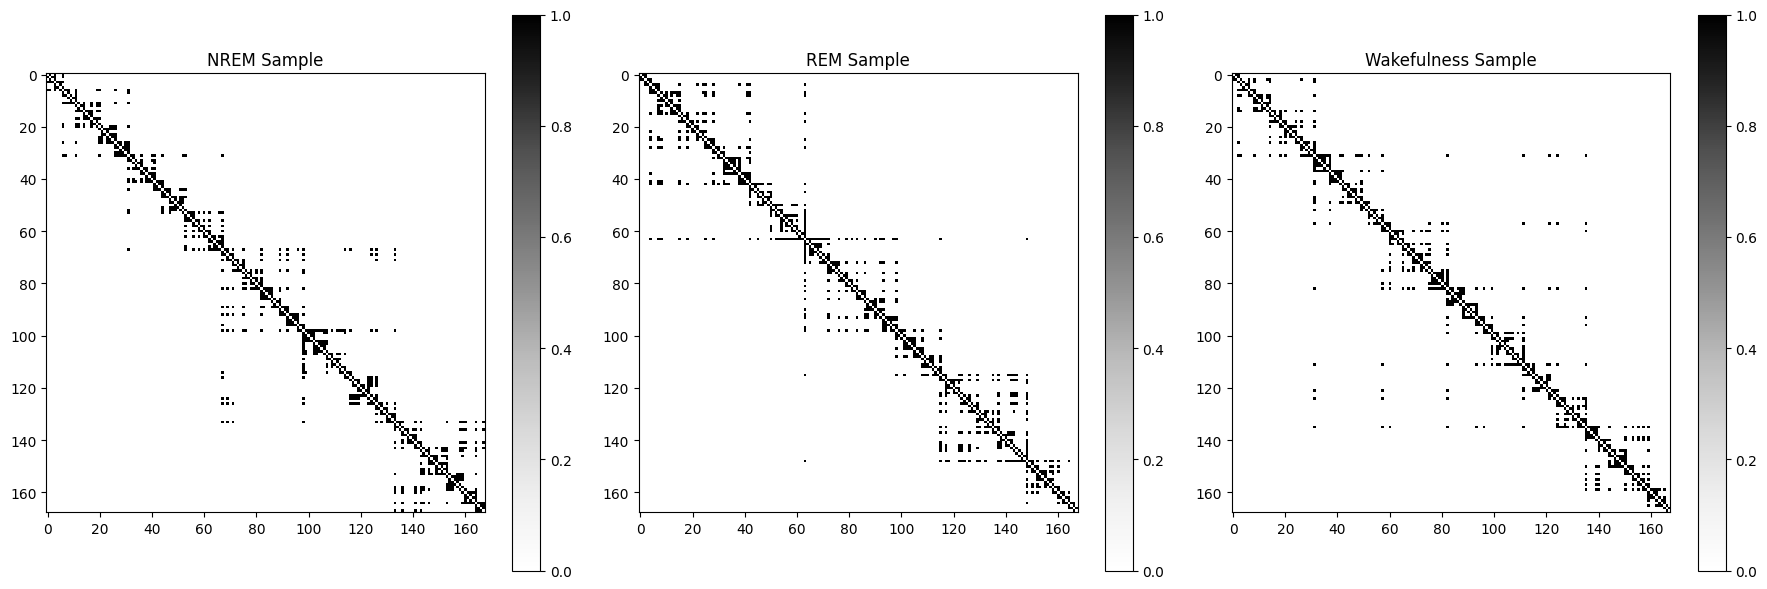

In [42]:
# Function to plot multiple sample visibility graphs horizontally
def plot_multiple_graphs(data_samples, titles):
    fig, axes = plt.subplots(1, len(data_samples), figsize=(18, 6))
    for i, data in enumerate(data_samples):
        ax = axes[i]
        cax = ax.imshow(data, cmap='Greys', interpolation='none')
        ax.set_title(titles[i])
        plt.colorbar(cax, ax=ax)
    plt.tight_layout()
    plt.show()

# Selecting the first graph from each sleep state to plot horizontally
plot_multiple_graphs([nrem_sample[0][0], rem_sample[0][0], wakefulness_sample[0][0]],
                     ['NREM Sample', 'REM Sample', 'Wakefulness Sample'])

In [5]:
def print_statistics(data, label):
    non_zero_counts = np.count_nonzero(data)
    mean_val = np.mean(data)
    std_dev = np.std(data)
    print(f"{label} - Non-Zero Count: {non_zero_counts}, Mean: {mean_val:.4f}, Std Dev: {std_dev:.4f}")

# Calculate and print statistics for each state
print_statistics(cat_0_data, "NREM")
print_statistics(cat_1_data, "REM")
print_statistics(cat_2_data, "Wakefulness")


NREM - Non-Zero Count: 2975806, Mean: 0.0362, Std Dev: 0.1867
REM - Non-Zero Count: 991930, Mean: 0.0337, Std Dev: 0.1804
Wakefulness - Non-Zero Count: 28980100, Mean: 0.0355, Std Dev: 0.1851


## Summary Statistics

In [43]:
def print_statistics(data, label):
    non_zero_counts = np.count_nonzero(data)
    mean_val = np.mean(data)
    std_dev = np.std(data)
    print(f"{label} - Non-Zero Count: {non_zero_counts}, Mean: {mean_val:.4f}, Std Dev: {std_dev:.4f}")

# Calculate and print statistics for each state
print_statistics(nrem_sample, "NREM")
print_statistics(rem_sample, "REM")
print_statistics(wakefulness_sample, "Wakefulness")


NREM - Non-Zero Count: 2975806, Mean: 0.0362, Std Dev: 0.1867
REM - Non-Zero Count: 991930, Mean: 0.0337, Std Dev: 0.1804
Wakefulness - Non-Zero Count: 28980100, Mean: 0.0355, Std Dev: 0.1851


## Visualise a each category

In [6]:
def visualize_data(data, title):
    plt.figure(figsize=(12, 10))
    plt.imshow(data, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f"Heatmap of {title}")
    plt.show()

    plt.figure(figsize=(12, 10))
    plt.hist(data.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Histogram of Values in {title}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


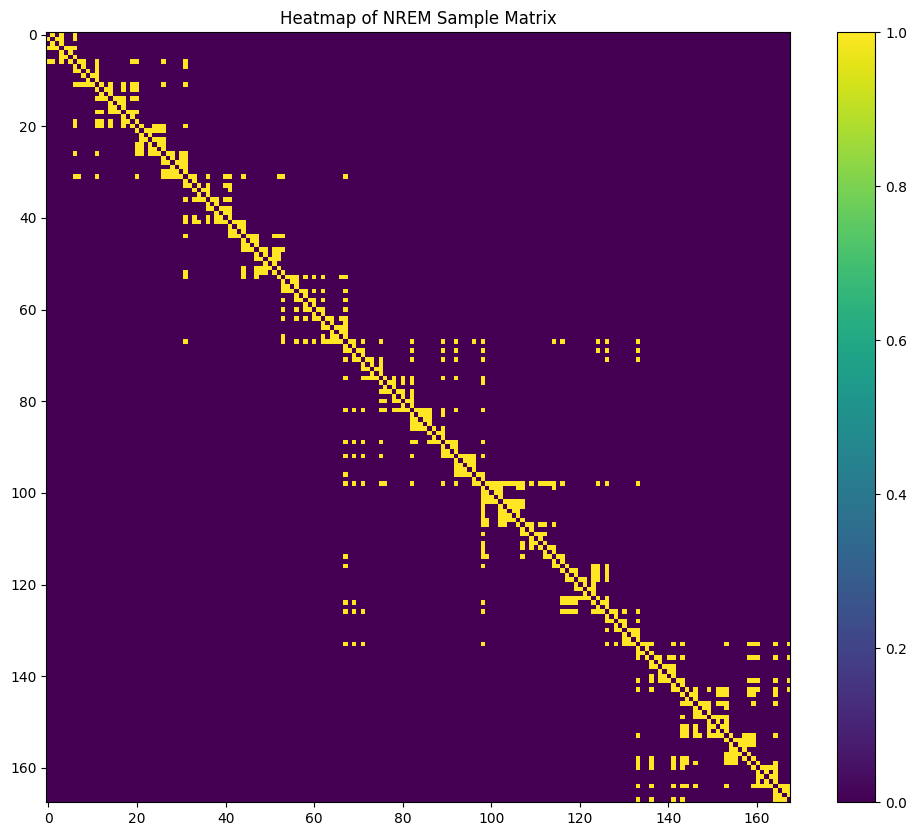

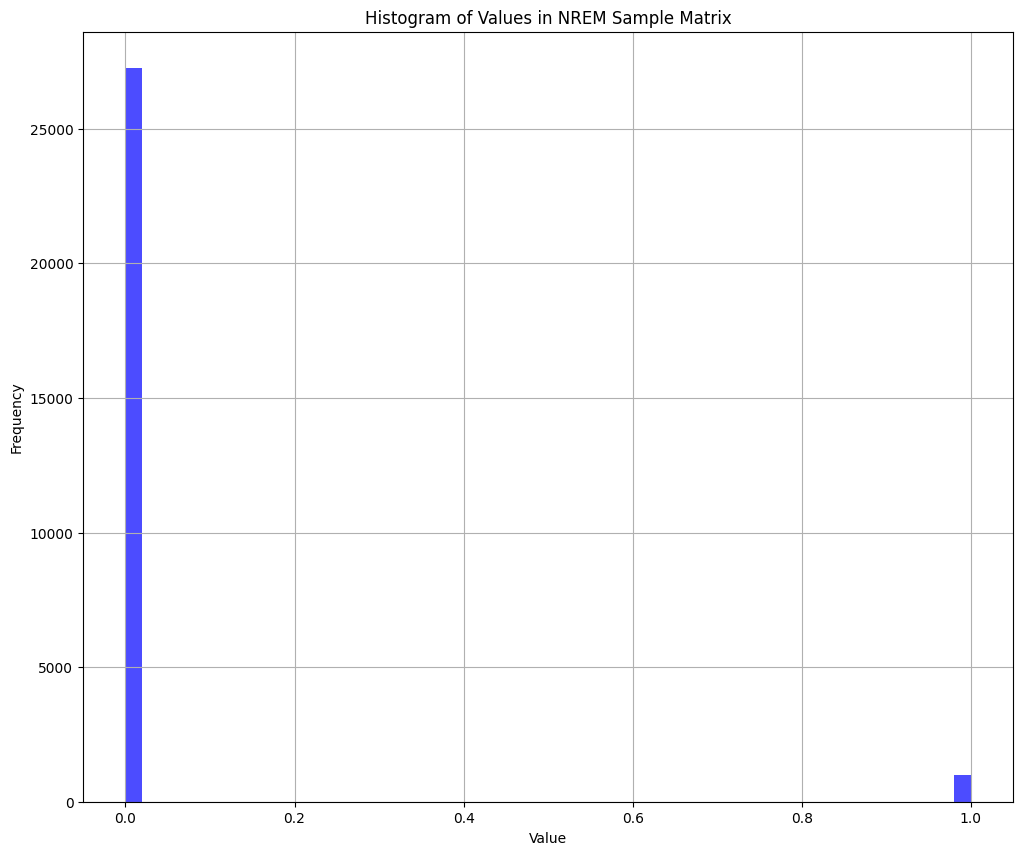

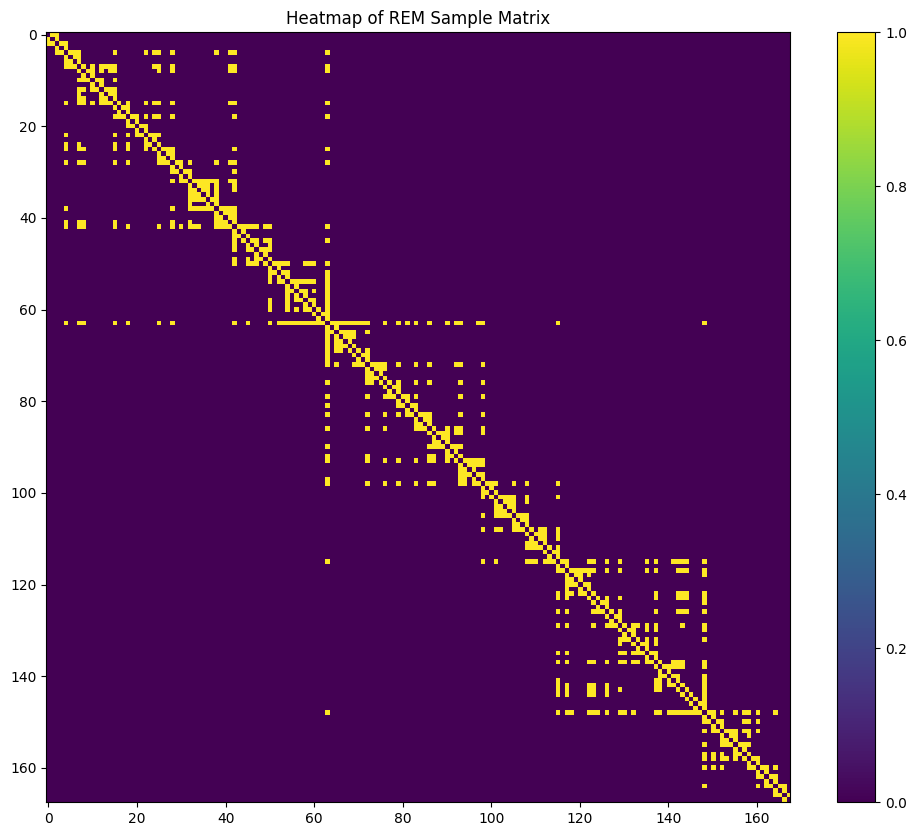

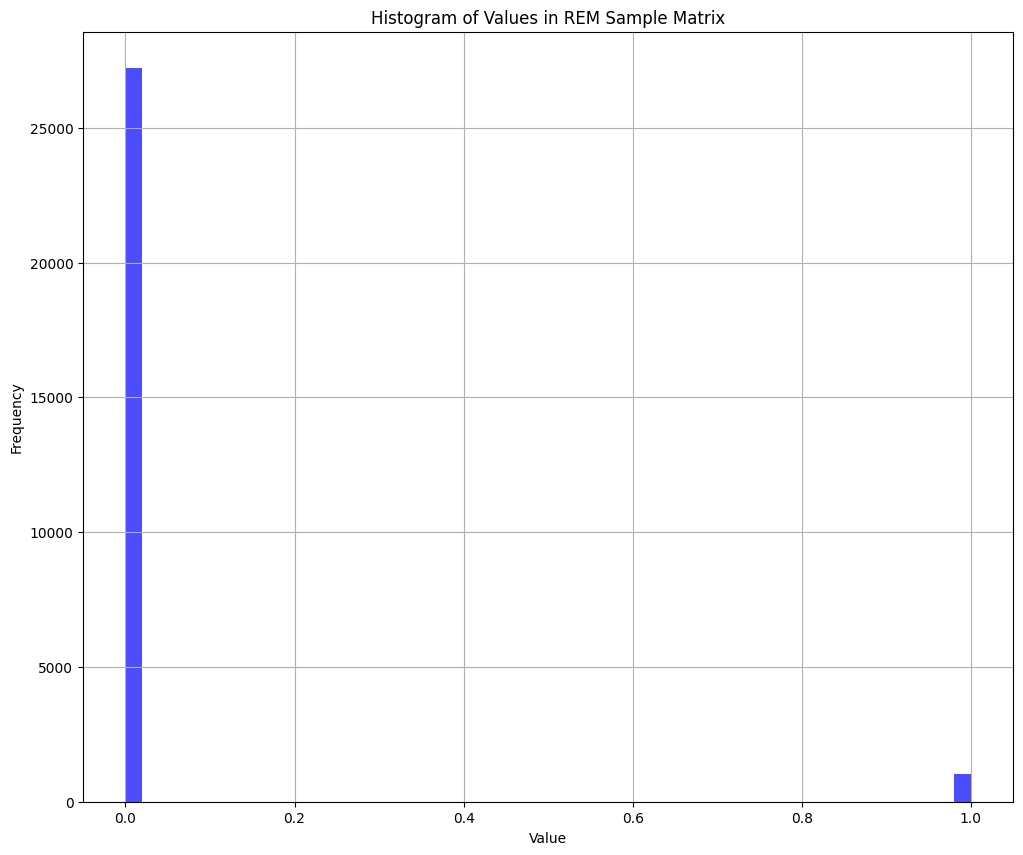

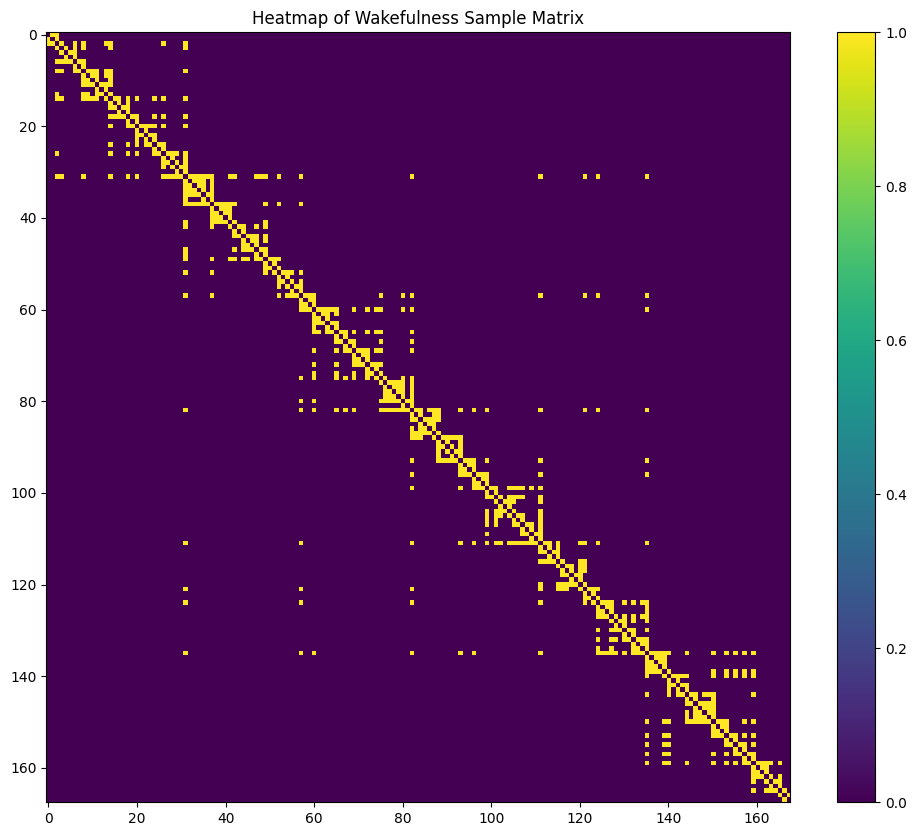

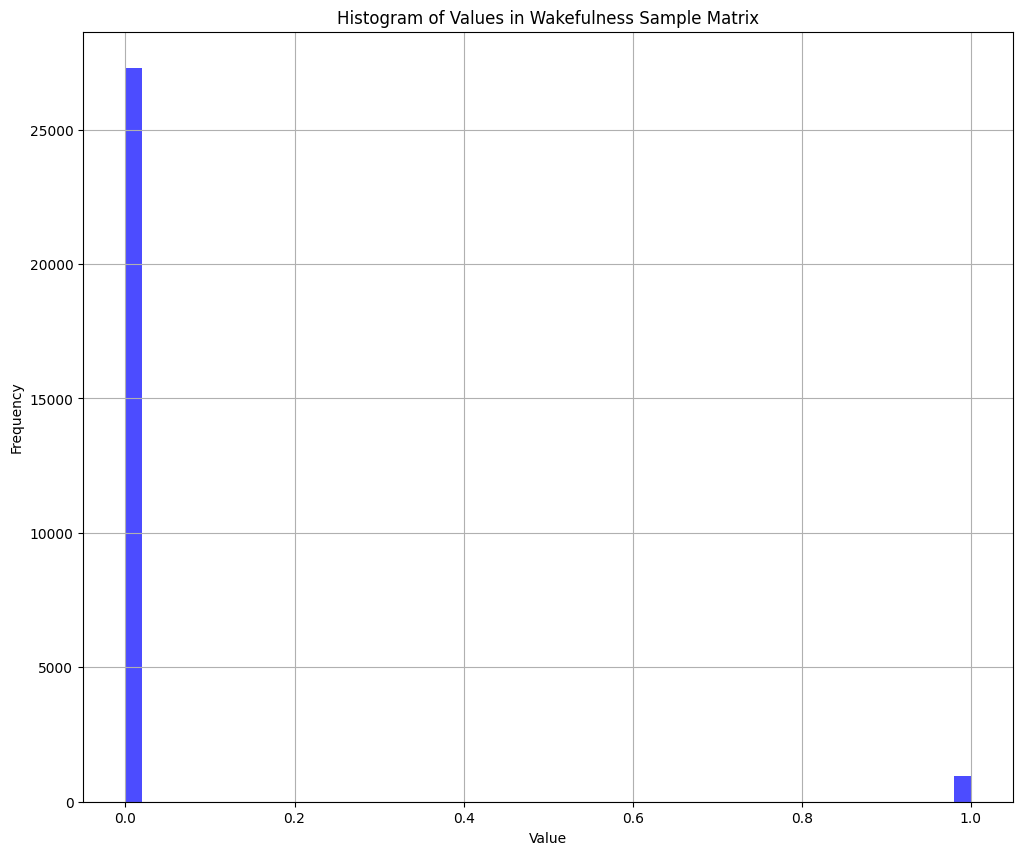

In [9]:
visualize_data(nrem_sample[0][0], "NREM Sample Matrix")
visualize_data(rem_sample[0][0], "REM Sample Matrix")
visualize_data(wakefulness_sample[0][0], "Wakefulness Sample Matrix")

In [29]:
def visualize_correlation(data_list, title):
    # Reshape each 3D array into a 2D array
    flat_data = [matrix.reshape(-1, matrix.shape[0]*matrix.shape[1]) for matrix in data_list]
    # Stack all 2D arrays vertically
    flat_data_stacked = np.vstack(flat_data)
    # Calculate correlation matrix
    correlation_matrix = np.corrcoef(flat_data_stacked.T)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap for {title}")
    plt.xlabel("Pixel Index")
    plt.ylabel("Pixel Index")
    plt.show()

In [26]:
cat_0_sample = np.array(cat_0_data[:10])  # Example data, replace with your actual data
cat_1_sample = np.array(cat_1_data[:10])  # Example data, replace with your actual data
cat_2_sample = np.array(cat_2_data[:10]) # Example data, replace with your actual data


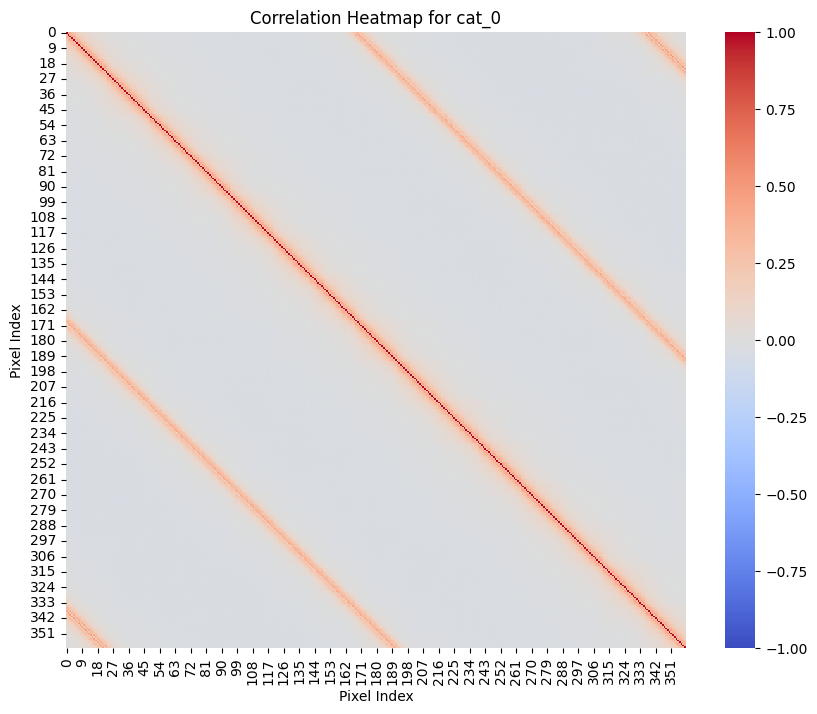

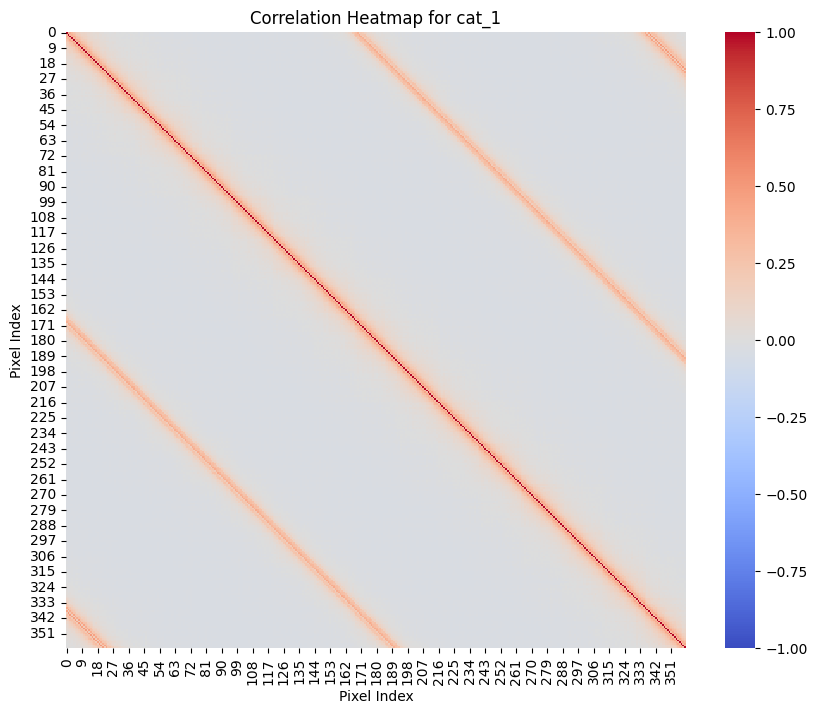

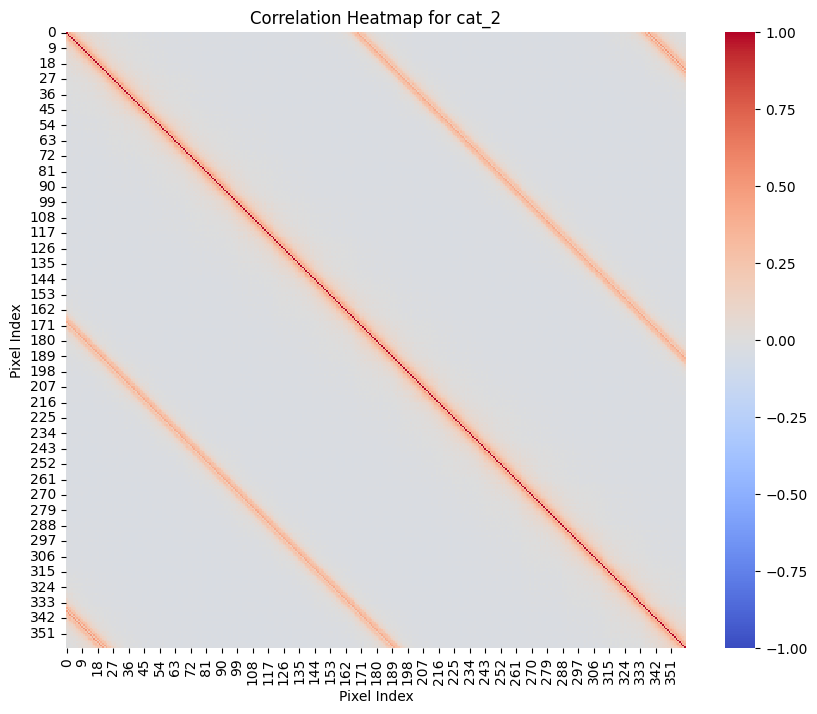

In [30]:
visualize_correlation([cat_0_sample], "cat_0")
visualize_correlation([cat_1_sample], "cat_1")
visualize_correlation([cat_2_sample], "cat_2")

Color: The color scale on the right shows that red indicates a high positive correlation, blue indicates a high negative correlation, and white represents no correlation.
Diagonal Line: The bright red diagonal line from the top-left corner to the bottom-right corner indicates that each pixel is perfectly correlated with itself (as expected).
Off-Diagonal Brightness: The presence of bright red off the diagonal indicates that there are pairs of pixels that show a high degree of positive correlation. This means that when the activity in one pixel increases or decreases, the activity in the correlated pixel tends to increase or decrease in a similar way.
Uniformity: The heatmap appears uniformly red, with no distinct patterns of blue or varying shades. This suggests that the data within category 0 is highly self-similar across the pixels or units being analyzed.

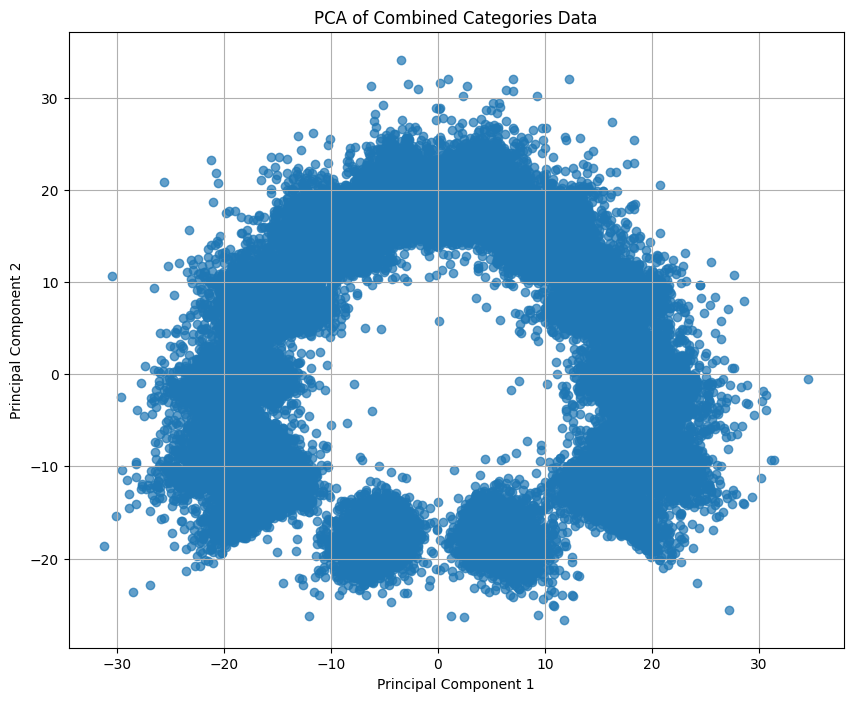

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Combine the data from all categories into a single array
all_data_combined = np.concatenate([cat_0_data, cat_1_data, cat_2_data])

# Flatten the 3D arrays into 2D
all_data_flat = all_data_combined.reshape(-1, cat_0_data.shape[1] * cat_0_data.shape[2])

# Standardize the data
scaler = StandardScaler()
all_data_flat_scaled = scaler.fit_transform(all_data_flat)

# Initialize PCA
pca = PCA(n_components=2)  # Choosing to reduce the data to 2 principal components for visualization

# Apply PCA
principal_components = pca.fit_transform(all_data_flat_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Combined Categories Data')
plt.grid(True)
plt.show()


There's a strong central tendency in your data, with many data points having similar scores on both principal components.
The spread or distribution of the data points away from the center indicates variability in your dataset that the PCA has captured.

This means in your data, most of the things you measured tend to be similar to each other, but there are still differences spreading out from the middle in every direction. It's like saying, while many people share common traits or behaviors, there's also a lot of individual variety. There aren't clear groups or distinct separations; it's more like a gradual range of differences spreading out from a common center.

In [34]:
def calculate_edge_density(data):
    densities = [np.count_nonzero(data[i]) / data[i].size for i in range(data.shape[0])]
    return densities

# Calculate edge densities for all samples in each sleep state
nrem_densities = calculate_edge_density(cat_1_data)
rem_densities = calculate_edge_density(cat_2_data)
wakefulness_densities = calculate_edge_density(cat_0_data)

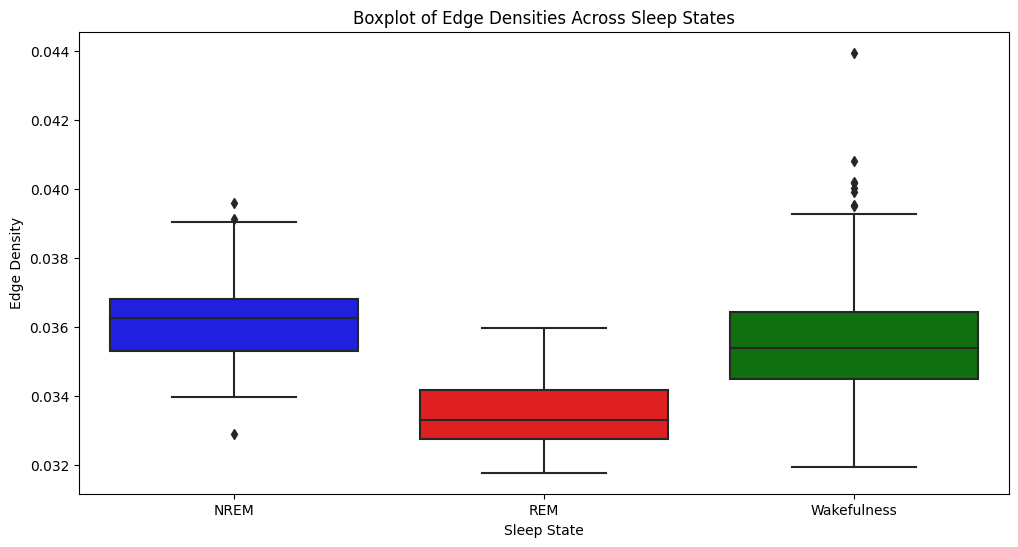

In [35]:
# 2. Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=[nrem_densities, rem_densities, wakefulness_densities], palette=['blue', 'red', 'green'])
plt.title('Boxplot of Edge Densities Across Sleep States')
plt.xlabel('Sleep State')
plt.ylabel('Edge Density')
plt.xticks([0, 1, 2], ['NREM', 'REM', 'Wakefulness'])
plt.show()

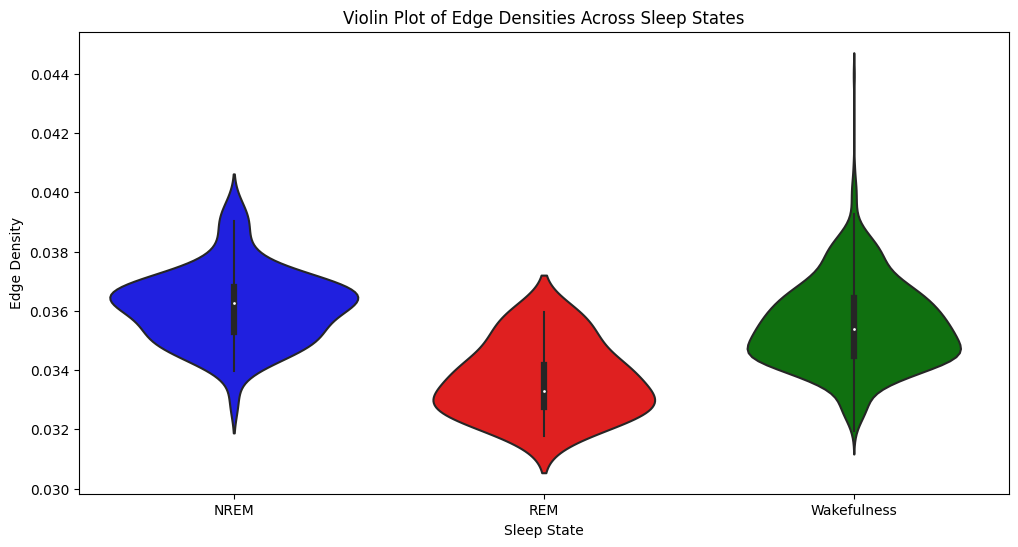

In [36]:
# 3. Violin Plots
plt.figure(figsize=(12, 6))
sns.violinplot(data=[nrem_densities, rem_densities, wakefulness_densities], palette=['blue', 'red', 'green'])
plt.title('Violin Plot of Edge Densities Across Sleep States')
plt.xlabel('Sleep State')
plt.ylabel('Edge Density')
plt.xticks([0, 1, 2], ['NREM', 'REM', 'Wakefulness'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


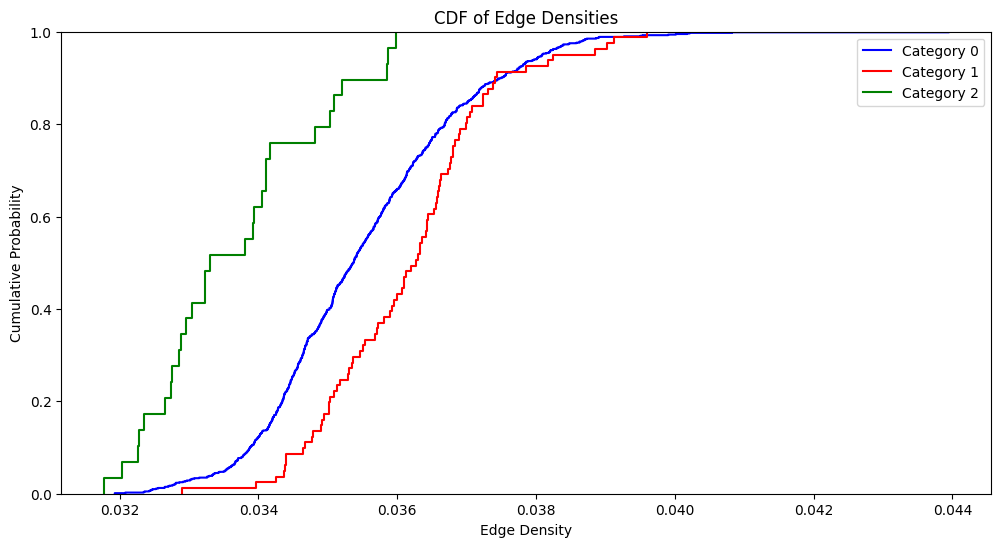

In [37]:
plt.figure(figsize=(12, 6))
sns.ecdfplot(wakefulness_densities, color='blue', label='Category 0')
sns.ecdfplot(nrem_densities, color='red', label='Category 1')
sns.ecdfplot(rem_densities, color='green', label='Category 2')
plt.title('CDF of Edge Densities')
plt.xlabel('Edge Density')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


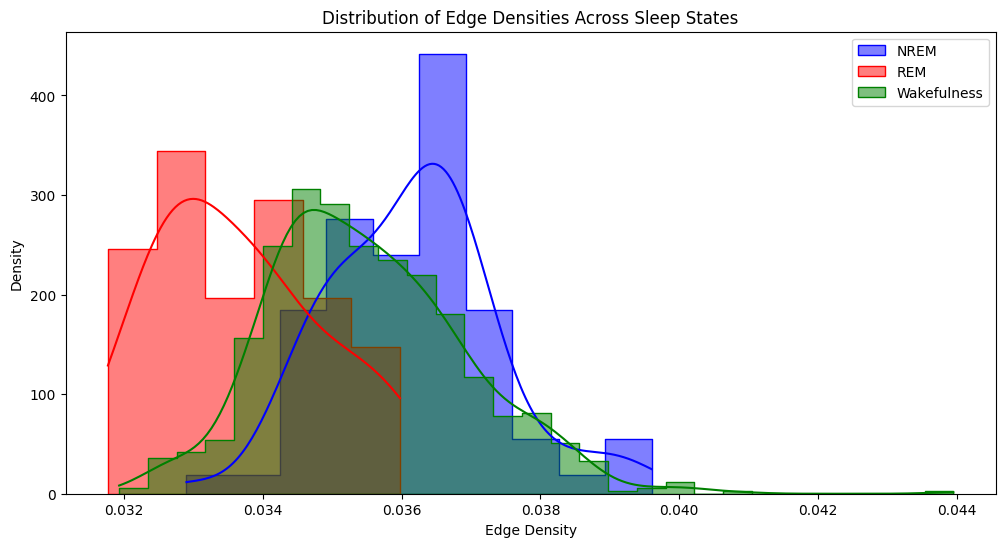

In [44]:
import seaborn as sns
# Define a function to calculate the edge density of each graph in the dataset
def calculate_edge_density(data):
    densities = [np.count_nonzero(data[i]) / data[i].size for i in range(data.shape[0])]
    return densities

# Calculate edge densities for all samples in each sleep state
nrem_densities = calculate_edge_density(nrem_sample)
rem_densities = calculate_edge_density(rem_sample)
wakefulness_densities = calculate_edge_density(wakefulness_sample)

# Plotting the distributions of edge densities
plt.figure(figsize=(12, 6))
sns.histplot(nrem_densities, color='blue', label='NREM', kde=True, element='step', stat="density")
sns.histplot(rem_densities, color='red', label='REM', kde=True, element='step', stat="density")
sns.histplot(wakefulness_densities, color='green', label='Wakefulness', kde=True, element='step', stat="density")
plt.title('Distribution of Edge Densities Across Sleep States')
plt.xlabel('Edge Density')
plt.ylabel('Density')
plt.legend()
plt.show()

## **Interpretation of the Distributions:**


**NREM Sleep:**

The distribution for NREM sleep is centered around a slightly higher edge density compared to REM and wakefulness. This could indicate more consistent and perhaps stronger neural connectivity during NREM sleep. NREM is known for its slow-wave activity, which is associated with higher synchronization across large neuronal populations. The visibility graph's higher edge density could be reflecting these known physiological characteristics.

**REM Sleep:**

The edge density distribution for REM is similar to that of wakefulness but distinct enough to suggest unique patterns. REM sleep, often considered similar to wakefulness due to higher brain activity levels compared to NREM, shows a spread in connectivity that might capture the dynamic and rapid brain activity changes typical for this phase. The similarity to wakefulness in the distribution curve reinforces the notion of REM as an active brain state.

**Wakefulness:**

The distribution for wakefulness exhibits variability in edge density, which might reflect the diverse range of neural activities and interactions occurring during wakeful states. The variability and range might be due to different types of sensory input and motor outputs that are being processed by the brain during wakefulness.
"""